In [1]:
# Install the software we need
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 359.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 242.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 244.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 229.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 205.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 263.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 308.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting 

In [2]:
import numpy as np
import pandas as pd
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import pylab

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


## **Drawing Waveform From Parameters**
### **Question 1**
##### Time domain waveform using the parameters we already know from previous exercies for example: m1,m2

Text(0, 0.5, 'Strain')

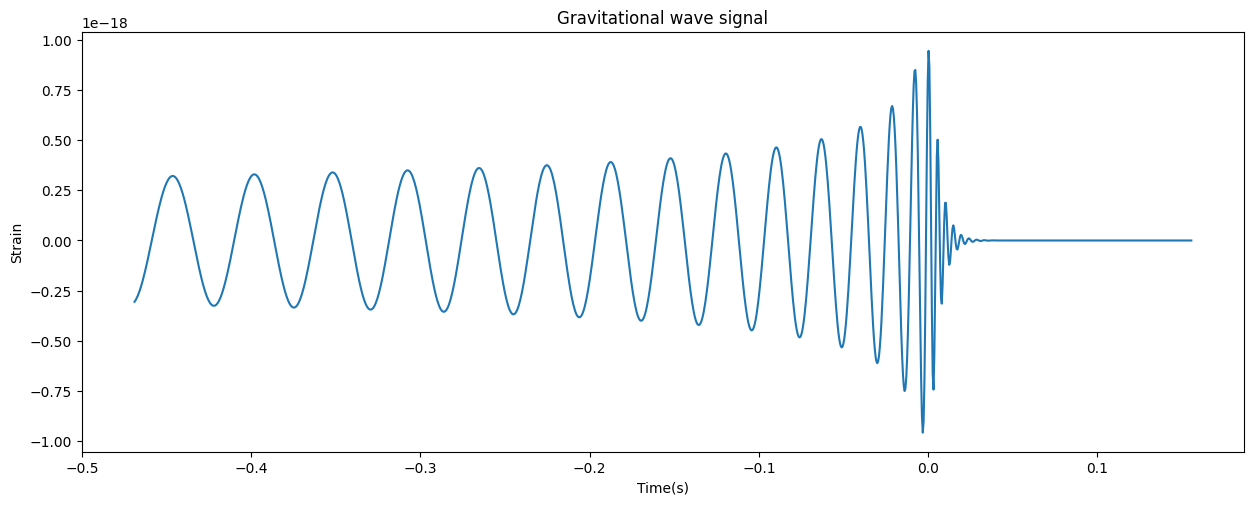

In [31]:
m1=41
m2=41
f_lower=20
approximant="SEOBNRv4"
delta_t=1.0/2048
hp,_=get_td_waveform(approximant=approximant,mass1=m1,mass2=m2,delta_t=delta_t,f_lower=f_lower)
#pylab.xlim([-0.05- 0.1, -0.05+0.1])
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.title('Gravitational wave signal')
pylab.plot(hp.sample_times, hp, label='Plus polarization')
pylab.xlabel('Time(s)')
pylab.ylabel('Strain')

### **Question 2**

Text(0, 0.5, 'Strain')

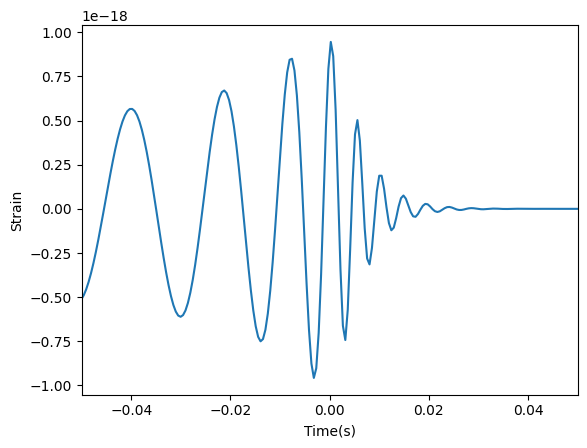

In [37]:
#zooming in near the merger time
pylab.xlim([0- 0.05,0+0.05])
pylab.plot(hp.sample_times.numpy(), hp.numpy(), label='Plus polarization')
pylab.xlabel('Time(s)')
pylab.ylabel('Strain')

### **Question 3**

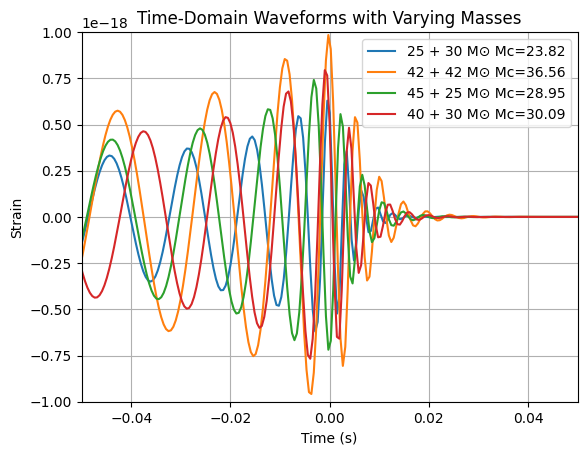

In [42]:

mass_ranges = [(25,30), (42,42), (45, 25),(40,30)]  # Different mass combinations
for mass1, mass2 in mass_ranges:
    U=((mass1*mass2)/(mass1+mass2))
    M=mass1+mass2
    chirpmass1=((U**3)*(M**2))**(.2)
    Mc = round(chirpmass1, 2)

    hp, _ = get_td_waveform(approximant=approximant, mass1=mass1, mass2=mass2, delta_t=1.0/2048, f_lower=37.4)
    pylab.xlim([0- 0.05,0+0.05])
    pylab.ylim([-10e-19,10e-19])
    plt.plot(hp.sample_times, hp, label=f'{mass1} + {mass2} M⊙ Mc={Mc}')

plt.title('Time-Domain Waveforms with Varying Masses')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend()
plt.grid(True)
plt.show()



*   We can see that the change in waveform is dependent on chirp mass and ratio of inividual masses
*   As chirp mass increases amplitude of strain also increases
*   The close the ratio of individual masses is to one the more is the amplitude of strain

In [11]:
strain_data = pd.read_table('https://raw.githubusercontent.com/SAURABH-RAI1729/KRITIGW/main/GW150914_strain_data_final.txt', sep='\t', header=None)

In [12]:
strain_data = strain_data.rename(columns = {0 : 'time', 1 : 'strain'})

In [13]:
size = len(strain_data)

-0.006103515625

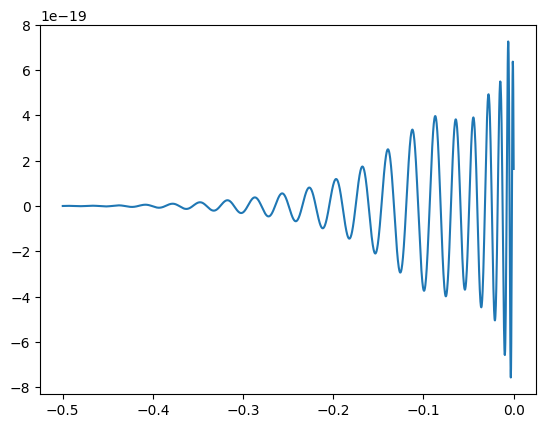

In [14]:
plt.plot(strain_data['time'], strain_data['strain'])

max_strain_idx =  strain_data['strain'].idxmax()

max_strain_time = strain_data['time'][max_strain_idx]

max_strain_time


We can improve our findings of chirp mass by looking at the strain vs time plot that we obtained from LIGO and by looking into the plot of different masses obtained above by comparing their strain value to the one we obtained from the GW150914 event.

We find that the strain value of mass combination of 40,30 chirp mass=30.9 is close to the strain value of GW150914 event.